## Student performance analysis and final grade prediction.

The dataset and its description is available here: https://archive.ics.uci.edu/ml/datasets/student+performance

The goal of this project is to predict the final grade of a student using the background information about the student.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.linear_model import LogisticRegression


np.random.seed(2)

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

In [2]:
df = pd.read_csv("data/student-mat.csv", sep = ';')

In [3]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

In [5]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

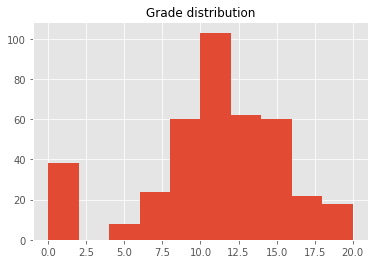

In [6]:
plt.figure(figsize=(6, 4))
plt.hist(df.G3)
plt.title('Grade distribution', fontsize=12)
plt.show()

###### Effect of School and reason for selecting school

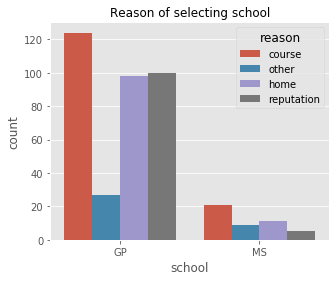

In [7]:
plt.figure(figsize=(5, 4))
sns.countplot(x = 'school', hue = 'reason', data = df )
plt.title('Reason of selecting school', fontsize=12)
plt.show()

School selection is mostly based on 'course preference'

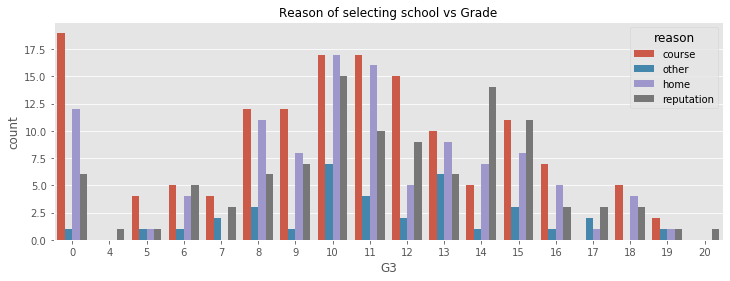

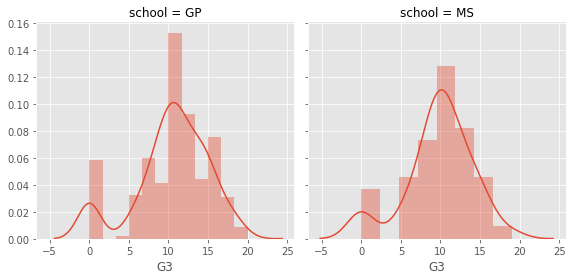

In [8]:
plt.figure(figsize=(12,4))
sns.countplot(x = 'G3', hue = 'reason', data = df )
plt.title('Reason of selecting school vs Grade', fontsize=12)
plt.show()

g = sns.FacetGrid(df, col='school', height=4)
g = g.map(sns.distplot,  "G3").add_legend()

Looks like even when school is selected on course preference, there are so many failures. Also, the average grade of both the schools looks same.

##### Effect of internet

In [9]:
df.internet.value_counts()

yes    329
no      66
Name: internet, dtype: int64

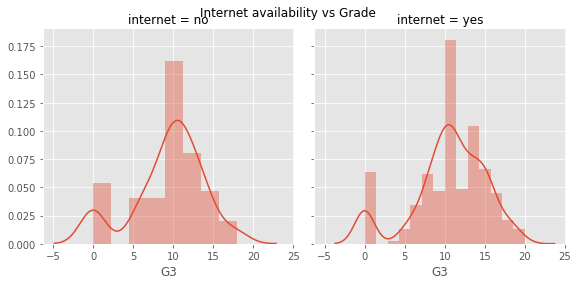

In [10]:
g = sns.FacetGrid(df, col='internet', height=4)
g = g.map(sns.distplot,  "G3").add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Internet availability vs Grade', fontsize=12)
plt.show()

Visually, the internet usage seems to have no effect on the grade.

##### Effect of Family size

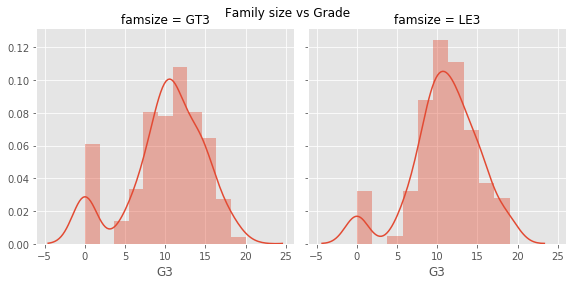

In [11]:
g = sns.FacetGrid(df, col='famsize', height=4)
g = g.map(sns.distplot,  "G3").add_legend()
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Family size vs Grade', fontsize=12)
plt.show()

The number of failures is more when family size is greater than 3.

##### Effect of attendance

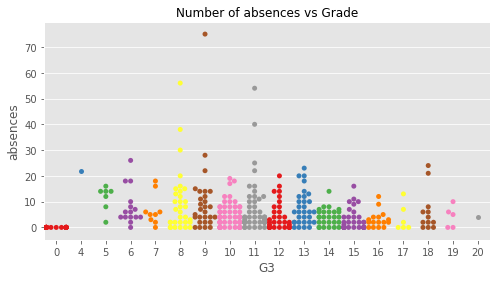

In [12]:
plt.figure(figsize=(8, 4))
sns.swarmplot(x ='G3',y='absences', data = df, palette = sns.color_palette("Set1"))
plt.title('Number of absences vs Grade', fontsize=12)
plt.show()

##### Are extra classes helping?

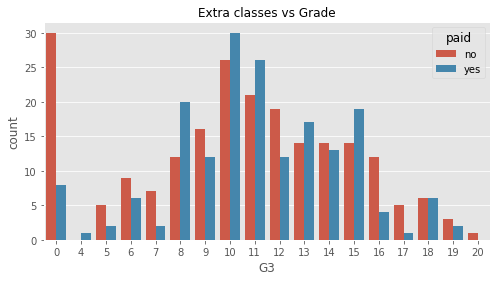

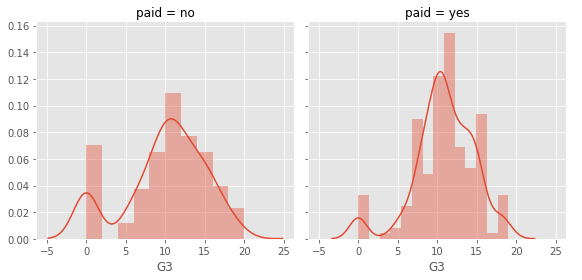

In [13]:
plt.figure(figsize=(8, 4))
sns.countplot(x = 'G3', hue = 'paid', data = df )
plt.title('Extra classes vs Grade', fontsize=12)
plt.show()

g = sns.FacetGrid(df, col='paid', height=4)
g = g.map(sns.distplot,  "G3").add_legend()

Extra classes are helping some students

##### Effect of Alcohol consumption

* Workday alcoholic consumption

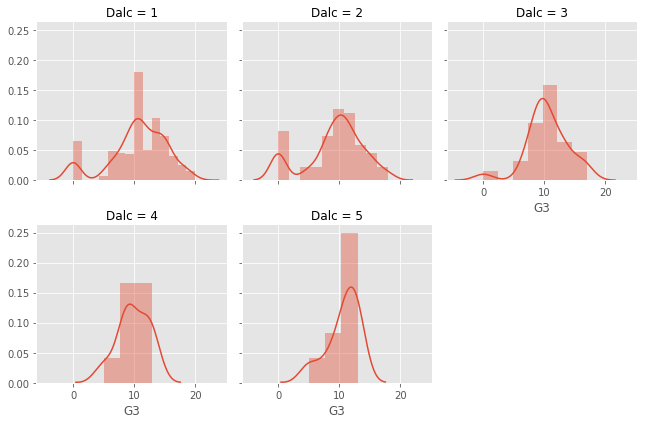

In [14]:
g = sns.FacetGrid(df, col='Dalc', height=3, col_wrap=3)
g = g.map(sns.distplot,  "G3").add_legend()

Students consuming high amounts of alochol on a daily basis tend to get lower grades than students consuming lower amounts, as the distribution gets thinner as the alcoholic consumption increases.

An interesting thing to notice here, is that the number of failures in students who consume high amounts of alcohol is zero (also the number of students consuming high amounts of alcohol is less). 

* Weekend alcoholic consumption

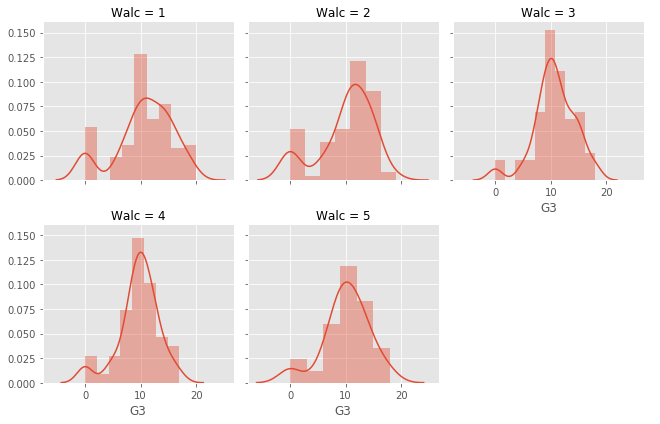

In [15]:
g = sns.FacetGrid(df, col='Walc', height=3, col_wrap=3)
g = g.map(sns.distplot,  "G3").add_legend()

Consumption of alcohol on weekends seems to not effect the students performance, as the distribution remains the same for any alcohol amount.

#### Converting categorical columns into numerical

In [16]:
binary_encoder = lambda x: 1 if x == 'yes' else 0

df.schoolsup = df.schoolsup.apply(binary_encoder)
df.famsup = df.famsup.apply(binary_encoder)
df.paid = df.paid.apply(binary_encoder)
df.activities = df.activities.apply(binary_encoder)
df.nursery = df.nursery.apply(binary_encoder)
df.higher = df.higher.apply(binary_encoder)
df.internet = df.internet.apply(binary_encoder)
df.romantic = df.romantic.apply(binary_encoder)

sex_encoder = lambda x: 1 if x == 'F' else (0 if x == 'M' else x)
df.sex = df.sex.apply(sex_encoder)

address_encoder = lambda x: 1 if x == 'U' else (0 if x == 'R' else x)
df.address = df.address.apply(address_encoder)

famsize_encoder = lambda x: 1 if x == 'GT3' else (0 if x == 'LE3' else x)
df.famsize = df.famsize.apply(famsize_encoder)

pstatus_encoder = lambda x: 1 if x == 'T' else (0 if x == 'A' else x)
df.Pstatus = df.Pstatus.apply(pstatus_encoder)

school_encoder = lambda x: 1 if x == 'GP' else (0 if x == 'MS' else x)
df.school = df.school.apply(school_encoder)

def job_encoder(val):
    if val == 'teacher':
        val = 0
    elif val == 'health':
        val = 1
    elif val == 'services':
        val = 2
    elif val == 'at_home':
        val = 3
    elif val == 'other':
        val = 4
    else:
        val = val
    return val

            
df.Mjob = df.Mjob.apply(job_encoder)
df.Fjob = df.Fjob.apply(job_encoder)

def reason_encoder(val):
    if val == 'course':
        val = 0
    elif val == 'home':
        val = 1
    elif val == 'reputation':
        val = 2
    elif val == 'other':
        val = 3
    else:
        val = val
    return val

df.reason = df.reason.apply(reason_encoder)

def gaurdian_encoder(val):
    if val == 'mother':
        val = 0
    elif val == 'father':
        val = 1
    elif val == 'other':
        val = 2
    else:
        val = val
    return val

df.guardian = df.guardian.apply(gaurdian_encoder)


In [17]:
df.guardian.unique()

array([0, 1, 2], dtype=int64)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null int64
sex           395 non-null int64
age           395 non-null int64
address       395 non-null int64
famsize       395 non-null int64
Pstatus       395 non-null int64
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int64
Fjob          395 non-null int64
reason        395 non-null int64
guardian      395 non-null int64
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null int64
famsup        395 non-null int64
paid          395 non-null int64
activities    395 non-null int64
nursery       395 non-null int64
higher        395 non-null int64
internet      395 non-null int64
romantic      395 non-null int64
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 non-null int64
Walc

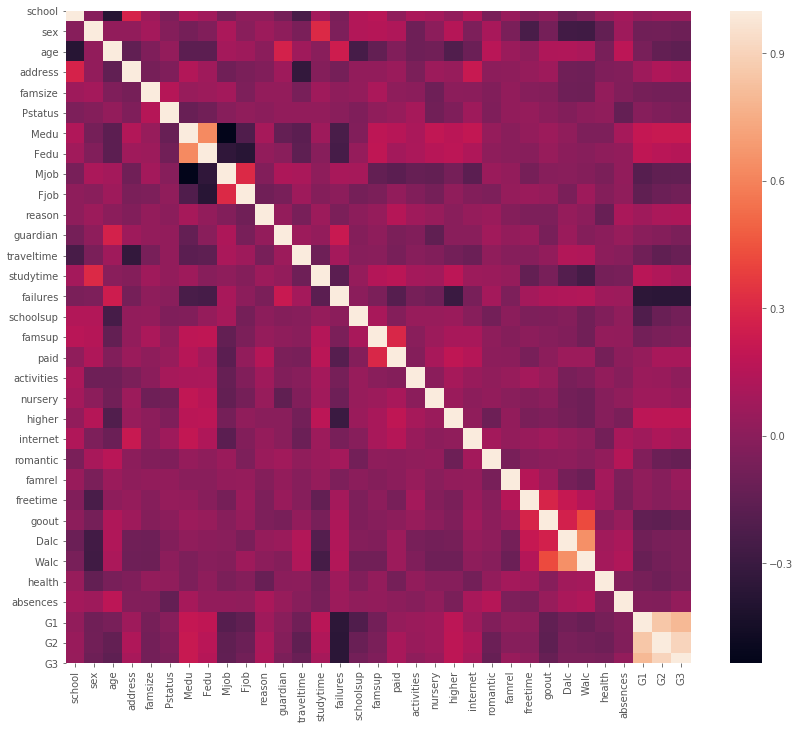

In [19]:
corr = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr)

In [20]:
def scale_and_split(df, test_sizre=0.3):
    
    target = df[['G3']]
    features = df.drop('G3', axis = 1)
    labels = list(target.G3.unique())
    
#     scaler = StandardScaler()
#     features = scaler.fit_transform(features)
    
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
    
    return X_train, X_test, y_train, y_test, labels

In [21]:
def evaluate_classifier(model, df):
    
    X_train, X_test, y_train, y_test, labels = scale_and_split(df)
    
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print('Cross validation score - ', scores.mean()*100)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred) 
    print('Test accuracy - ',accuracy*100)

In [22]:
def evaluate_regressor(model, df):
    
    X_train, X_test, y_train, y_test, labels = scale_and_split(df)
    
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print('Cross validation score - ', scores.mean()*100)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('MSE - ', mse)
    print('R2 Score - ', r2*100)

#### Classification

In [23]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier(criterion='gini', max_depth=12, random_state=42)
rfc = RandomForestClassifier(n_estimators=100, max_depth=12 ,random_state=42)
adc = AdaBoostClassifier()

print('\nEvaluation results - Logistic Regression')
evaluate_classifier(lr, df)

print('\nEvaluation results - Decision Tree Classifier')
evaluate_classifier(dtc, df)

print('\nEvaluation results - Random Forest Classifier')
evaluate_classifier(rfc, df)

print('\nEvaluation results - Adaboost Classifier')
evaluate_classifier(adc, df)


Evaluation results - Logistic Regression
Cross validation score -  27.383487877909786
Test accuracy -  26.05042016806723

Evaluation results - Decision Tree Classifier
Cross validation score -  35.37356321839081
Test accuracy -  32.773109243697476

Evaluation results - Random Forest Classifier
Cross validation score -  42.45967352458225
Test accuracy -  37.81512605042017

Evaluation results - Adaboost Classifier
Cross validation score -  25.623048069802635
Test accuracy -  18.487394957983195


#### Regression

In [24]:
lr = LinearRegression()
lasso = Lasso()
dtr = DecisionTreeRegressor( random_state=42)
rfr = RandomForestRegressor( random_state=42)
adr = AdaBoostRegressor()

print('\nEvaluation results - Linear Regression')
evaluate_regressor(lr, df)

print('\nEvaluation results - Decision Tree Regressor')
evaluate_regressor(dtr, df)

print('\nEvaluation results - Random Forest Regressor')
evaluate_regressor(rfr, df)

print('\nEvaluation results - Adaboost Regressor')
evaluate_regressor(adr, df)


Evaluation results - Linear Regression
Cross validation score -  82.31006113274347
MSE -  4.6705531727628555
R2 Score -  78.75289009550808

Evaluation results - Decision Tree Regressor
Cross validation score -  77.11080798264864
MSE -  4.588235294117647
R2 Score -  79.1273675824317

Evaluation results - Random Forest Regressor
Cross validation score -  88.61424372868265
MSE -  4.036890756302522
R2 Score -  81.635524016345

Evaluation results - Adaboost Regressor
Cross validation score -  87.8651427703319
MSE -  3.2562502178260737
R2 Score -  85.18678544157339


Best score is with Adaboost regressor, but none of the models seem to perform well.